In [20]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [34]:
pip install scipy

  Obtaining dependency information for scipy from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 165.2 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 187.9 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 291.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/43.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/43.7 MB 1.6 MB/s eta 0:00:28
   ---------------------------------------- 0.2/43.7 MB 2.7 MB/s eta 0:00:16
   ---------------------------------------- 0.4/43.7 MB 3.0 MB/s eta 0:00:15
    --------------------------------------- 0.6/43.7 MB 3.6 MB/s eta 0:00:13
    ----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from src.preprocessing import Preprocessing

In [23]:
data = pd.read_csv('../wdbc.data.csv')

columns_name = [
    'id',
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave_points_mean',
    'symmetry_mean',
    'fractal_dimension_mean',
    'radius_se',
    'texture_se',
    'perimeter_se',
    'area_se',
    'smoothness_se',
    'compactness_se',
    'concavity_se',
    'concave_points_se',
    'symmetry_se',
    'fractal_dimension_se',
    'radius_worst',
    'texture_worst',
    'perimeter_worst',
    'area_worst',
    'smoothness_worst',
    'compactness_worst',
    'concavity_worst',
    'concave_points_worst',
    'symmetry_worst',
    'fractal_dimension_worst',
]


data = data.rename(columns=dict(zip(data.columns, columns_name)))

In [27]:
data = data.drop('id', axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
Y = data['diagnosis'].replace({'M': 1, 'B': 0}).values
data['diagnosis'].replace(to_replace=dict(M = 1, B = 0), inplace = True)
Y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

In [47]:
X = Preprocessing.build_design_matrix(data.iloc[:,1:].values)
X, Y

(array([[ 1.     , 20.57   , 17.77   , ...,  0.186  ,  0.275  ,  0.08902],
        [ 1.     , 19.69   , 21.25   , ...,  0.243  ,  0.3613 ,  0.08758],
        [ 1.     , 11.42   , 20.38   , ...,  0.2575 ,  0.6638 ,  0.173  ],
        ...,
        [ 1.     , 16.6    , 28.08   , ...,  0.1418 ,  0.2218 ,  0.0782 ],
        [ 1.     , 20.6    , 29.33   , ...,  0.265  ,  0.4087 ,  0.124  ],
        [ 1.     ,  7.76   , 24.54   , ...,  0.     ,  0.2871 ,  0.07039]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 

In [48]:
from src.algorithms import PLA
from src.models import LinearModel, LogisticModel
from src.optimizers import SteepestDescentMethod, NewtonsMethod
from src.analyzers import PlotterAlgorithmObserver
from src.stop_criteria import CompositeStopCriteria, MaxIterationStopCriteria, MinErrorStopCriteria

In [53]:
def plot_sigmoide(model):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    x = np.array([np.linspace(min(X[:,1]), max(X[:,1]), 50)]).T
    Xs = Preprocessing.build_design_matrix(x)
    fig, ax = plt.subplots(1,1)
    ax.scatter(X[:,1], y, alpha=.3)
    ax.plot(x, model.predict(Xs))
    # ax.plot(x, sigmoid(model.w[0] + model.w[1]*x))
    plt.show()

def plot_strategy(optimizer, learning_rate, model):
    alg = PLA(optimizer, model)
    min_error = 0.01
    max_iteration = 100

    np.random.seed(seed=0)
    stop_criteria = CompositeStopCriteria()
    stop_criteria.add(MinErrorStopCriteria(min_error=min_error))
    stop_criteria.add(MaxIterationStopCriteria(max_iteration=max_iteration))

    analyzer = PlotterAlgorithmObserver()
    alg.add(analyzer)

    alg.fit(X, y, stop_criteria)

    final_iteration = max(analyzer.iterations)
    print(f"Final Iteration: {final_iteration}")
    print(f"Final Error: {analyzer.errors[final_iteration]}")
    print(f"Final Weights: {analyzer.weights[final_iteration]}")
    analyzer.plot()
    plot_sigmoide(model)

Final Iteration: 99
Final Error: nan
Final Weights: [[-9.75652485e-01]
 [-7.72574637e+00]
 [-1.44974194e+01]
 [-4.71850119e+01]
 [-5.58616657e+01]
 [-8.19292937e-02]
 [-2.64734733e-02]
 [ 4.61937838e-02]
 [ 2.38113794e-02]
 [-1.54764435e-01]
 [-6.14466334e-02]
 [-4.35044161e-02]
 [-1.17568112e+00]
 [-2.50160612e-01]
 [ 1.59876193e+01]
 [-7.22562883e-03]
 [-1.17121523e-02]
 [-1.18328648e-02]
 [-5.25815452e-03]
 [-1.96433998e-02]
 [-3.14940686e-03]
 [-7.32095838e+00]
 [-1.83852573e+01]
 [-4.44495213e+01]
 [ 7.58948193e+01]
 [-1.06756026e-01]
 [-2.75121765e-02]
 [ 6.24588932e-02]
 [ 1.14197363e-02]
 [-2.21932341e-01]
 [-6.81359171e-02]]


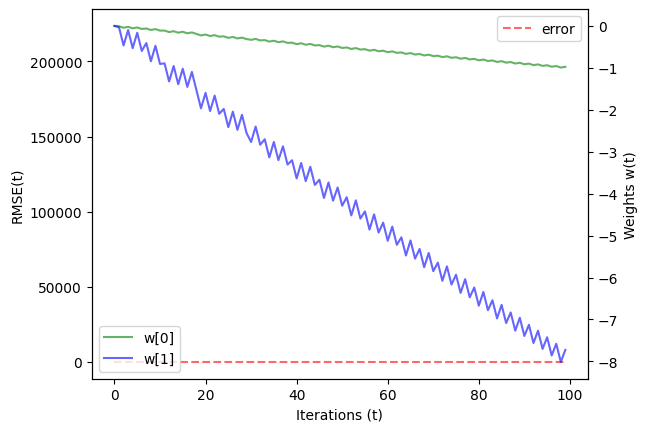

NameError: name 'y' is not defined

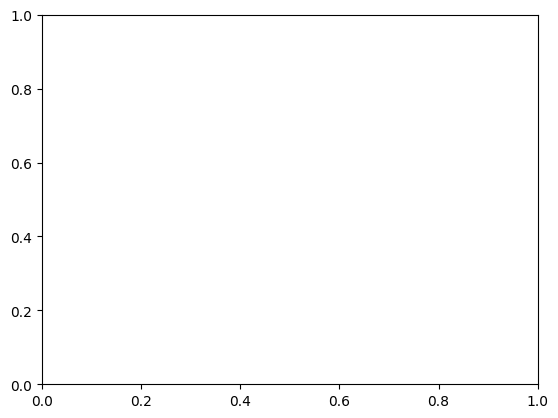

In [57]:
learning_rate = 0.0001 
model = LogisticModel()
optimizer = SteepestDescentMethod(learning_rate)
plot_strategy(optimizer, learning_rate, model)